In [1]:
set.seed(190903)

# Labor. darbas (1)
# Ⅰ
# ①

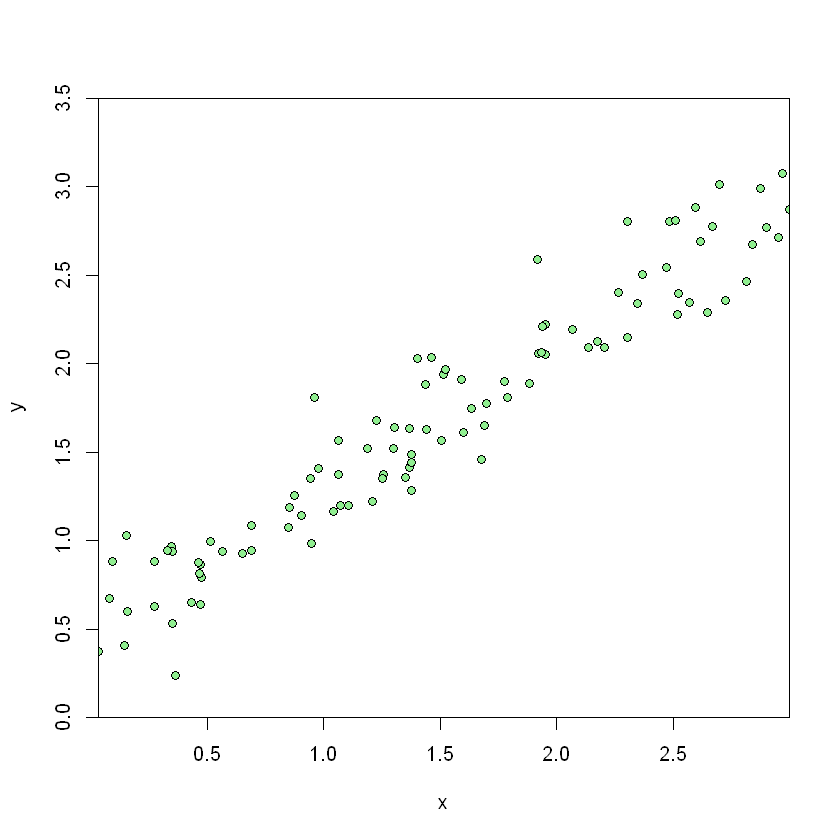

In [2]:
N = 100
x = runif(N, min = 0, max = 3)   # x(1), ..., x(N)
e = rnorm(N, mean = 0, sd = .2)  # e(1), ..., e(N)
a = .5
b = .8

y = a + b * x + e

plot(x, y, ylim=c(0, 3.5), yaxs="i", xaxs="i", pch=21, bg="lightgreen")

# ②

In [42]:
c('a tikroji reiksme'=a, 'b tikroji reiksme'=b)

x.deltasq = mean(x^2) - mean(x)
b.est = cov(x, y) / x.deltasq
a.est = mean(y) - b.est * mean(x)
c('a ivertis'=a.est, 'b ivertis'=b.est)

b.est.delta = 3
c('a.ivert - a.tikr'=a.est - a, 'b ivert - b.tikr'=b.est - b)

a tikroji reiksme b tikroji reiksme 
              0.5               0.8

a ivertis b ivertis 
1.0712203 0.4114221

a.ivert - a.tikr b ivert - b.tikr 
       0.5712203       -0.3885779

# Ⅱ